# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [69]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pydot in c:\users\zigui oumaro\anaconda3\lib\site-packages (1.4.2)



In [209]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
import itertools
import os
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.utils import np_utils
from sklearn import metrics 
import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [210]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [211]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")


# Normalize image vectors
X_train = X_train_orig/255.0
X_test = X_test_orig/255.0

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


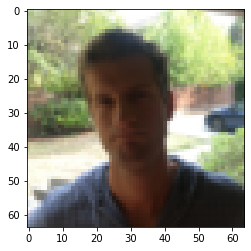

In [212]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [213]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (7,7),padding = 'Same', activation ='relu', input_shape = (64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_17 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 32768)             0         
                                                                 
 dense_17 (Dense)            (None, 1)                 32769     
                                                                 
Total params: 37,633
Trainable params: 37,569
Non-tra

In [214]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [215]:
history_model = model.fit(X_train, Y_train,validation_split=0.2, batch_size = 64, epochs= 5)

Epoch 1/5
8/8 [==============================] - 11s 1s/step - loss: 2.0420 - accuracy: 0.5542 - val_loss: 0.6379 - val_accuracy: 0.5750
Epoch 2/5
8/8 [==============================] - 7s 802ms/step - loss: 0.4304 - accuracy: 0.7708 - val_loss: 0.6115 - val_accuracy: 0.8250
Epoch 3/5
8/8 [==============================] - 7s 902ms/step - loss: 0.3029 - accuracy: 0.8750 - val_loss: 0.5838 - val_accuracy: 0.7583
Epoch 4/5
8/8 [==============================] - 7s 887ms/step - loss: 0.2211 - accuracy: 0.9250 - val_loss: 0.5690 - val_accuracy: 0.7583
Epoch 5/5
8/8 [==============================] - 7s 900ms/step - loss: 0.1947 - accuracy: 0.9292 - val_loss: 0.5651 - val_accuracy: 0.6833


# Evaluate / Test

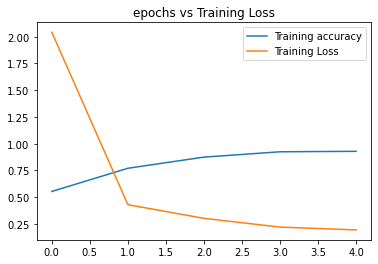

In [216]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [217]:
# Code Here
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=64,verbose=1)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

3/3 [==============================] - 1s 212ms/step - loss: 0.6119 - accuracy: 0.6267
Test loss: 0.6119 accuracy: 0.6267


Confusion Matrix

5/5 [==============================] - 1s 160ms/step


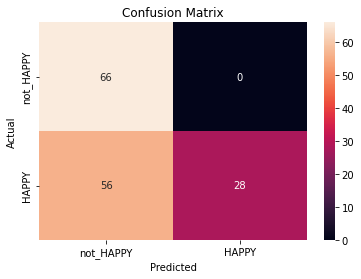

In [228]:
Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred).astype(int)
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True,xticklabels=['not_HAPPY', 'HAPPY'], yticklabels=['not_HAPPY', 'HAPPY'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [235]:
predictions = model.predict([X_test])

5/5 [==============================] - 1s 133ms/step


In [236]:
Y_test[33]

array([1], dtype=int64)

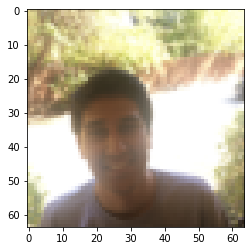

In [237]:
plt.imshow(X_test[33])

# optimizers

In [246]:
#Gradient Descent with Momentum (SGD)
SGD_model = model
SGD_model.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='SGD')

In [247]:
history_model = SGD_model.fit(X_train, Y_train,validation_split=0.2, batch_size = 64, epochs= 5)

Epoch 1/5
8/8 [==============================] - 10s 993ms/step - loss: 0.2068 - accuracy: 0.9271 - val_loss: 0.5120 - val_accuracy: 0.7250
Epoch 2/5
8/8 [==============================] - 6s 777ms/step - loss: 1.4344 - accuracy: 0.6062 - val_loss: 1.2832 - val_accuracy: 0.4583
Epoch 3/5
8/8 [==============================] - 7s 846ms/step - loss: 1.1079 - accuracy: 0.7000 - val_loss: 0.3847 - val_accuracy: 0.8250
Epoch 4/5
8/8 [==============================] - 7s 825ms/step - loss: 0.2121 - accuracy: 0.9208 - val_loss: 0.3635 - val_accuracy: 0.8500
Epoch 5/5
8/8 [==============================] - 6s 799ms/step - loss: 0.1667 - accuracy: 0.9438 - val_loss: 0.3685 - val_accuracy: 0.8500


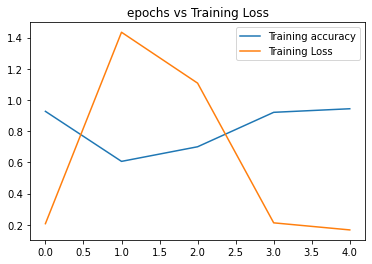

In [248]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

# Evaluate Test set

In [250]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=64,verbose=1)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

3/3 [==============================] - 1s 195ms/step - loss: 0.4803 - accuracy: 0.7333
Test loss: 0.4803 accuracy: 0.7333


In [251]:
#Root Mean Square Propagation (RMSProp)
RMSProp_model = model
RMSProp_model.compile(loss ='binary_crossentropy',metrics =['accuracy'],optimizer='RMSProp')

In [252]:
history_model = RMSProp_model.fit(X_train, Y_train,validation_split=0.2, batch_size = 64, epochs= 5)

Epoch 1/5
8/8 [==============================] - 11s 964ms/step - loss: 0.4664 - accuracy: 0.8417 - val_loss: 0.3548 - val_accuracy: 0.8750
Epoch 2/5
8/8 [==============================] - 7s 867ms/step - loss: 0.1638 - accuracy: 0.9417 - val_loss: 0.6605 - val_accuracy: 0.5167
Epoch 3/5
8/8 [==============================] - 8s 946ms/step - loss: 0.2786 - accuracy: 0.8792 - val_loss: 0.3167 - val_accuracy: 0.8667
Epoch 4/5
8/8 [==============================] - 8s 908ms/step - loss: 0.1155 - accuracy: 0.9542 - val_loss: 0.3758 - val_accuracy: 0.8333
Epoch 5/5
8/8 [==============================] - 7s 870ms/step - loss: 0.1796 - accuracy: 0.9187 - val_loss: 0.3501 - val_accuracy: 0.8583


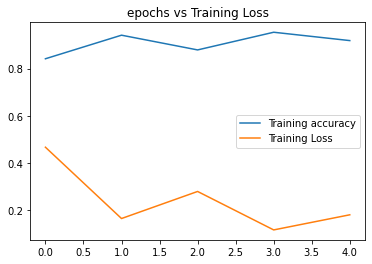

In [253]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

# Evaluate Test set

In [254]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=64,verbose=1)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

3/3 [==============================] - 1s 187ms/step - loss: 0.3926 - accuracy: 0.8133
Test loss: 0.3926 accuracy: 0.8133


# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)
